Load packages

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

Load Dataset and split

In [2]:

# Load the dataset
df = pd.read_csv('binary.arff.csv')

# Split data into X (features) and Y (target)
X = df.iloc[:, :-1].values  # Features
Y = df.iloc[:, -1].values   # Labels

# Convert categorical labels to binary labels
le = LabelEncoder()
Y = le.fit_transform(Y)  # Encode 'ALL' as 0 and 'AML' as 1


Data Visualization

In [101]:
# head
display(df.head())

# columns
display(df.columns)


,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,CLASS
0,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,1023,67,214,-135,1074,475,48,168,-70,ALL
1,-87,-248,262,295,-226,-493,367,-452,194,162,...,529,-295,352,-67,67,263,-33,-33,-21,ALL
2,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,383,46,104,15,245,164,84,100,-18,ALL
3,22,-153,17,276,-211,-250,55,-141,0,500,...,399,16,558,24,893,297,6,1971,-42,ALL
4,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,91,-84,615,-52,1235,9,7,1545,-81,ALL


Index(['AFFX-BioB-5_at', 'AFFX-BioB-M_at', 'AFFX-BioB-3_at', 'AFFX-BioC-5_at',
       'AFFX-BioC-3_at', 'AFFX-BioDn-5_at', 'AFFX-BioDn-3_at',
       'AFFX-CreX-5_at', 'AFFX-CreX-3_at', 'AFFX-BioB-5_st',
       ...
       'U58516_at', 'U73738_at', 'X06956_at', 'X16699_at', 'X83863_at',
       'Z17240_at', 'L49218_f_at', 'M71243_f_at', 'Z78285_f_at', 'CLASS'],
      dtype='object', length=7130)

SVM

In [102]:
# Split the dataset into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=14)

# Build the model
svm = SVC(kernel='rbf', random_state=14)

# Train the model
svm.fit(X_train, Y_train)

# Predict the labels for the test set
Y_pred = svm.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))


Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.67      0.80         3

    accuracy                           0.93        15
   macro avg       0.96      0.83      0.88        15
weighted avg       0.94      0.93      0.93        15

Confusion Matrix:
[[12  0]
 [ 1  2]]


Cross Validation Score for SVM

In [103]:
# Perform n-fold cross-validation
n = 20
cv_scores = cross_val_score(svm, X, Y, cv=n)

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Accuracy:", cv_scores.mean())

Cross-validation Scores: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.5        0.75
 1.         0.66666667 1.         1.         0.66666667 1.
 1.         0.66666667]
Mean Cross-validation Accuracy: 0.9125


ROC-AUC


ROC-AUC: 0.8333


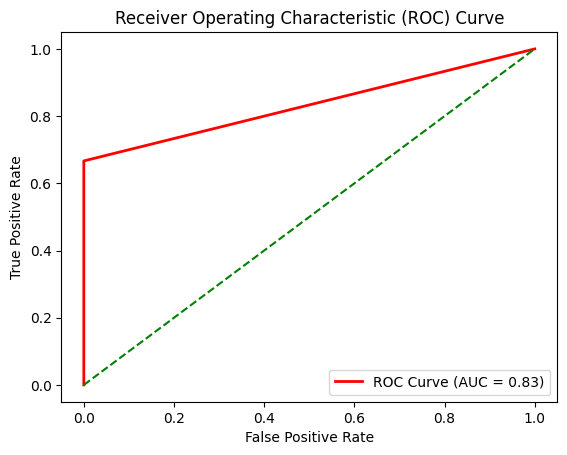

In [104]:

# Calculate ROC AUC score
roc_auc = metrics.roc_auc_score(Y_test, Y_pred)
print(f"ROC-AUC: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



RF

In [105]:
# Split the dataset into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

# Build the Random Forest model
rf = RandomForestClassifier(n_estimators=11, random_state=13)

# Train the model
rf.fit(X_train, Y_train)

# Predict the labels for the test set
Y_pred = rf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.75      0.86         4

    accuracy                           0.93        15
   macro avg       0.96      0.88      0.91        15
weighted avg       0.94      0.93      0.93        15

Confusion Matrix:
[[11  0]
 [ 1  3]]


Cross Validation Score for Random Forest

In [106]:
# Perform n-fold cross-validation
n = 5
cv_scores = cross_val_score(rf, X, Y, cv=n)

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Accuracy:", cv_scores.mean())

Cross-validation Scores: [0.86666667 0.8        0.85714286 0.85714286 0.92857143]
Mean Cross-validation Accuracy: 0.8619047619047618


ROC-AUC

ROC-AUC: 0.8750


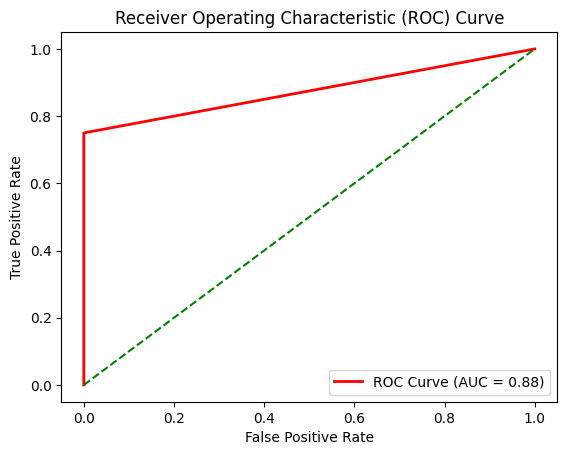

In [107]:

# Calculate ROC AUC score
roc_auc = metrics.roc_auc_score(Y_test, Y_pred)
print(f"ROC-AUC: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

